<a href="https://colab.research.google.com/github/sayeem038/AI-Model-for-SMS-Spam-Detection-using-TF-IDF-and-Naive-Bayes-Classification/blob/main/AI_Model_for_SMS_Spam_Detection_using_TF_IDF_and_Naive_Bayes_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Project Title: AI Model for SMS Spam Detection using TF-IDF and Naive Bayes Classification.***

**Objective: Build an AI model that can classify SMS messages as spam or
legitimate. Use techniques like TF-IDF  with Naive Bayesclassifiers to identify spam messages.**

**Import Packages**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import re
import seaborn as sns
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

**Load Data**

In [15]:
def load_data():
    df = pd.read_csv("/content/spam.csv", encoding='latin-1')
    return df

In [16]:
df = load_data()

In [17]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('v1').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [18]:
df.shape

(5572, 5)

**Data cleaning**

In [19]:
# Drop those unwanted columns
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('v1').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [20]:
# rename the columns
new_name = {'v1':'is_spam', 'v2':'sms'}
df.rename(columns=new_name, inplace=True)
df

,is_spam,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('is_spam').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [21]:
df.head()

,is_spam,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('is_spam').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('sms').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('is_spam')):
  _plot_series(series, series_name, i)
  fig.legend(title='is_spam', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('sms')):
  _plot_series(series, series_name, i)
  fig.legend(title='sms', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['sms'].value_counts()
    for x_label, grp in _df_6.groupby('is_spam')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('is_spam')
_ = plt.ylabel('sms')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_7['is_spam'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_7, x='index', y='is_spam', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_8['sms'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_8, x='index', y='sms', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [22]:
df.tail()

,is_spam,sms
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


from matplotlib import pyplot as plt
import seaborn as sns
_df_9.groupby('is_spam').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_10.groupby('sms').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['sms'].value_counts()
    for x_label, grp in _df_11.groupby('is_spam')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('is_spam')
_ = plt.ylabel('sms')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   is_spam  5572 non-null   object
 1   sms      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [24]:
df.describe()

,is_spam,sms
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [25]:
# Check for null values
df.isnull().sum()

is_spam    0
sms        0
dtype: int64

**Exploratory Data Analysis**

In [26]:
# convert is_spam to numerical value
# say spam = 1
# non-spam = 0
df['is_spam'] = df['is_spam'].apply(lambda x: 1 if x=='spam' else 0)
df

,is_spam,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


from matplotlib import pyplot as plt
df['is_spam'].plot(kind='hist', bins=20, title='is_spam')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['is_spam'].plot(kind='line', figsize=(8, 4), title='is_spam')
plt.gca().spines[['top', 'right']].set_visible(False)

is_spam
0    4825
1     747
Name: count, dtype: int64


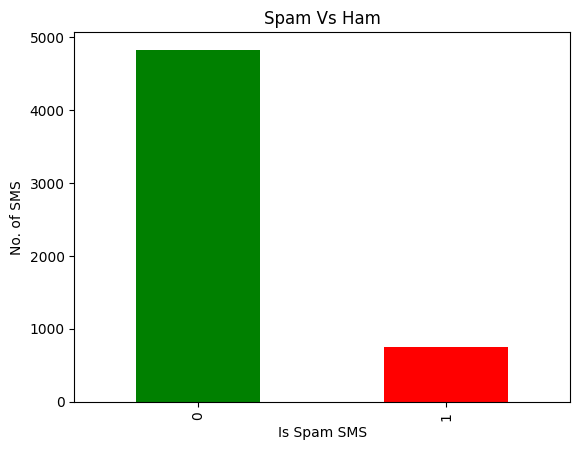

In [29]:
# spams and non-spam sms counts
import matplotlib.pyplot as plt # Import the matplotlib library and give it the alias 'plt'

spams = df['is_spam'].value_counts()
print(spams)
spams.plot(kind='bar', color=['green','red'])
plt.title("Spam Vs Ham")
plt.xlabel("Is Spam SMS")
plt.ylabel("No. of SMS")
plt.show()

([<matplotlib.patches.Wedge at 0x7dd94bda63e0>,
 [Text(-1.0038714981945518, 0.4497132587689916, 'ham'),
  Text(1.0038714771419537, -0.44971330576360763, 'spam')],
 [Text(-0.5475662717424827, 0.24529814114672266, '86.59'),
  Text(0.5475662602592474, -0.2452981667801496, '13.41')])

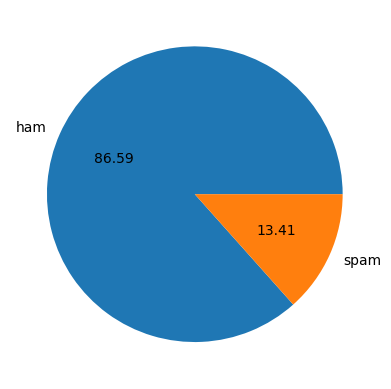

In [30]:
plt.pie(spams, labels=['ham','spam'], autopct='%0.2f')

In [32]:
!pip install nltk # Install nltk if you haven't already
import nltk # Import the nltk library

nltk.download('punkt') # Now you can use nltk functions

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [35]:
# prompt: stop_words = stopwords.words('english')
# stop_words

nltk.download('stopwords') # Download stopwords list
stop_words = stopwords.words('english')
stop_words


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [36]:
# Let's see how many words does each sms has
def get_words(sms_string):
    words = nltk.word_tokenize(sms_string)
    return len(words)

df['words_count'] = df['sms'].apply(get_words)
df

,is_spam,sms,words_count
0,0,"Go until jurong point, crazy.. Available only ...",24
1,0,Ok lar... Joking wif u oni...,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37
3,0,U dun say so early hor... U c already then say...,13
4,0,"Nah I don't think he goes to usf, he lives aro...",15
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,35
5568,0,Will Ì_ b going to esplanade fr home?,9
5569,0,"Pity, * was in mood for that. So...any other s...",15
5570,0,The guy did some bitching but I acted like i'd...,27


from matplotlib import pyplot as plt
df['is_spam'].plot(kind='hist', bins=20, title='is_spam')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['words_count'].plot(kind='hist', bins=20, title='words_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='is_spam', y='words_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['is_spam'].plot(kind='line', figsize=(8, 4), title='is_spam')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['words_count'].plot(kind='line', figsize=(8, 4), title='words_count')
plt.gca().spines[['top', 'right']].set_visible(False)

In [37]:
# Averge words per sms in spam and ham sms
# df['sms'].apply(get_words).
df.groupby('is_spam')['words_count'].mean()

is_spam
0    17.276269
1    27.891566
Name: words_count, dtype: float64

In [38]:
# Looks like the spam sms are comparatively lengthy than ham sms.

In [39]:
# Sentences in each sms
def get_sentences(sms_string):
    sens = nltk.sent_tokenize(sms_string)
    return len(sens)

df['sentence_count'] = df['sms'].apply(get_sentences)

In [40]:
# Average sentences per sms
df.groupby('is_spam')['sentence_count'].mean()

is_spam
0    1.837720
1    3.021419
Name: sentence_count, dtype: float64

In [44]:
import re # Import the 're' module for regular expressions

df['numbers_count'] = df['sms'].apply(lambda x: len(re.findall(r'/b/d+/b', str(x))))
df

,is_spam,sms,words_count,sentence_count,numbers_count
0,0,"Go until jurong point, crazy.. Available only ...",24,2,0
1,0,Ok lar... Joking wif u oni...,8,2,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,2,0
3,0,U dun say so early hor... U c already then say...,13,1,0
4,0,"Nah I don't think he goes to usf, he lives aro...",15,1,0
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,35,4,0
5568,0,Will Ì_ b going to esplanade fr home?,9,1,0
5569,0,"Pity, * was in mood for that. So...any other s...",15,2,0
5570,0,The guy did some bitching but I acted like i'd...,27,1,0


from matplotlib import pyplot as plt
df['is_spam'].plot(kind='hist', bins=20, title='is_spam')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['words_count'].plot(kind='hist', bins=20, title='words_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['sentence_count'].plot(kind='hist', bins=20, title='sentence_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='is_spam', y='words_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='words_count', y='sentence_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['numbers_count']
  ys = series['is_spam']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('numbers_count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('numbers_count')
_ = plt.ylabel('is_spam')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['numbers_count']
  ys = series['words_count']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('numbers_count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('numbers_count')
_ = plt.ylabel('words_count')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['numbers_count']
  ys = series['sentence_count']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('numbers_count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('numbers_count')
_ = plt.ylabel('sentence_count')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['numbers_count']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'numbers_count'}, axis=1)
              .sort_values('numbers_count', ascending=True))
  xs = counted['numbers_count']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('numbers_count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('numbers_count')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
df['is_spam'].plot(kind='line', figsize=(8, 4), title='is_spam')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['words_count'].plot(kind='line', figsize=(8, 4), title='words_count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['sentence_count'].plot(kind='line', figsize=(8, 4), title='sentence_count')
plt.gca().spines[['top', 'right']].set_visible(False)

In [45]:
df.groupby('is_spam')['numbers_count'].mean()

is_spam
0    0.0
1    0.0
Name: numbers_count, dtype: float64

In [46]:
df.head()

,is_spam,sms,words_count,sentence_count,numbers_count
0,0,"Go until jurong point, crazy.. Available only ...",24,2,0
1,0,Ok lar... Joking wif u oni...,8,2,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,2,0
3,0,U dun say so early hor... U c already then say...,13,1,0
4,0,"Nah I don't think he goes to usf, he lives aro...",15,1,0


from matplotlib import pyplot as plt
_df_12['is_spam'].plot(kind='hist', bins=20, title='is_spam')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13['words_count'].plot(kind='hist', bins=20, title='words_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_14['sentence_count'].plot(kind='hist', bins=20, title='sentence_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_15.groupby('sms').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_16.plot(kind='scatter', x='is_spam', y='words_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17.plot(kind='scatter', x='words_count', y='sentence_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['numbers_count']
  ys = series['is_spam']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_18.sort_values('numbers_count', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('sms')):
  _plot_series(series, series_name, i)
  fig.legend(title='sms', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('numbers_count')
_ = plt.ylabel('is_spam')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['numbers_count']
  ys = series['words_count']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_19.sort_values('numbers_count', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('sms')):
  _plot_series(series, series_name, i)
  fig.legend(title='sms', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('numbers_count')
_ = plt.ylabel('words_count')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['numbers_count']
  ys = series['sentence_count']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_20.sort_values('numbers_count', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('sms')):
  _plot_series(series, series_name, i)
  fig.legend(title='sms', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('numbers_count')
_ = plt.ylabel('sentence_count')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['numbers_count']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'numbers_count'}, axis=1)
              .sort_values('numbers_count', ascending=True))
  xs = counted['numbers_count']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_21.sort_values('numbers_count', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('sms')):
  _plot_series(series, series_name, i)
  fig.legend(title='sms', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('numbers_count')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_22['is_spam'].plot(kind='line', figsize=(8, 4), title='is_spam')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_23['words_count'].plot(kind='line', figsize=(8, 4), title='words_count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_24['sentence_count'].plot(kind='line', figsize=(8, 4), title='sentence_count')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_25['sms'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_25, x='is_spam', y='sms', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_26['sms'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_26, x='words_count', y='sms', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_27['sms'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_27, x='sentence_count', y='sms', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [47]:
# describe the entire data frame
df.describe()

,is_spam,words_count,sentence_count,numbers_count
count,5572.000000,5572.000000,5572.000000,5572.0
mean,0.134063,18.699390,1.996411,0.0
std,0.340751,13.741932,1.520159,0.0
min,0.000000,1.000000,1.000000,0.0
25%,0.000000,9.000000,1.000000,0.0
50%,0.000000,15.000000,1.500000,0.0
75%,0.000000,27.000000,2.000000,0.0
max,1.000000,220.000000,38.000000,0.0


from matplotlib import pyplot as plt
_df_28['is_spam'].plot(kind='hist', bins=20, title='is_spam')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_29['words_count'].plot(kind='hist', bins=20, title='words_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_30['sentence_count'].plot(kind='hist', bins=20, title='sentence_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_31['numbers_count'].plot(kind='hist', bins=20, title='numbers_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_32.plot(kind='scatter', x='is_spam', y='words_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_33.plot(kind='scatter', x='words_count', y='sentence_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_34.plot(kind='scatter', x='sentence_count', y='numbers_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_35['is_spam'].plot(kind='line', figsize=(8, 4), title='is_spam')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_36['words_count'].plot(kind='line', figsize=(8, 4), title='words_count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_37['sentence_count'].plot(kind='line', figsize=(8, 4), title='sentence_count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_38['numbers_count'].plot(kind='line', figsize=(8, 4), title='numbers_count')
plt.gca().spines[['top', 'right']].set_visible(False)

**Analyzing only the Spam sms**

In [48]:
df[df['is_spam']==0].describe()

,is_spam,words_count,sentence_count,numbers_count
count,4825.0,4825.000000,4825.000000,4825.0
mean,0.0,17.276269,1.837720,0.0
std,0.0,13.988585,1.454388,0.0
min,0.0,1.000000,1.000000,0.0
25%,0.0,8.000000,1.000000,0.0
50%,0.0,13.000000,1.000000,0.0
75%,0.0,22.000000,2.000000,0.0
max,0.0,220.000000,38.000000,0.0


from matplotlib import pyplot as plt
_df_39['is_spam'].plot(kind='hist', bins=20, title='is_spam')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_40['words_count'].plot(kind='hist', bins=20, title='words_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_41['sentence_count'].plot(kind='hist', bins=20, title='sentence_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_42['numbers_count'].plot(kind='hist', bins=20, title='numbers_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_43.plot(kind='scatter', x='is_spam', y='words_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_44.plot(kind='scatter', x='words_count', y='sentence_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_45.plot(kind='scatter', x='sentence_count', y='numbers_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_46['is_spam'].plot(kind='line', figsize=(8, 4), title='is_spam')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_47['words_count'].plot(kind='line', figsize=(8, 4), title='words_count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_48['sentence_count'].plot(kind='line', figsize=(8, 4), title='sentence_count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_49['numbers_count'].plot(kind='line', figsize=(8, 4), title='numbers_count')
plt.gca().spines[['top', 'right']].set_visible(False)

**Analyzing only the Ham sms**

In [49]:
df[df['is_spam']==1].describe()

,is_spam,words_count,sentence_count,numbers_count
count,747.0,747.000000,747.000000,747.0
mean,1.0,27.891566,3.021419,0.0
std,0.0,6.867007,1.537580,0.0
min,1.0,2.000000,1.000000,0.0
25%,1.0,25.000000,2.000000,0.0
50%,1.0,29.000000,3.000000,0.0
75%,1.0,32.000000,4.000000,0.0
max,1.0,46.000000,9.000000,0.0


from matplotlib import pyplot as plt
_df_50['is_spam'].plot(kind='hist', bins=20, title='is_spam')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_51['words_count'].plot(kind='hist', bins=20, title='words_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_52['sentence_count'].plot(kind='hist', bins=20, title='sentence_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_53['numbers_count'].plot(kind='hist', bins=20, title='numbers_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_54.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_55.plot(kind='scatter', x='is_spam', y='words_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_56.plot(kind='scatter', x='words_count', y='sentence_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_57.plot(kind='scatter', x='sentence_count', y='numbers_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_58['is_spam'].plot(kind='line', figsize=(8, 4), title='is_spam')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_59['words_count'].plot(kind='line', figsize=(8, 4), title='words_count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_60['sentence_count'].plot(kind='line', figsize=(8, 4), title='sentence_count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_61['numbers_count'].plot(kind='line', figsize=(8, 4), title='numbers_count')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_62['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_62, x='is_spam', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_63['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_63, x='words_count', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_64['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_64, x='sentence_count', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_65['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_65, x='numbers_count', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

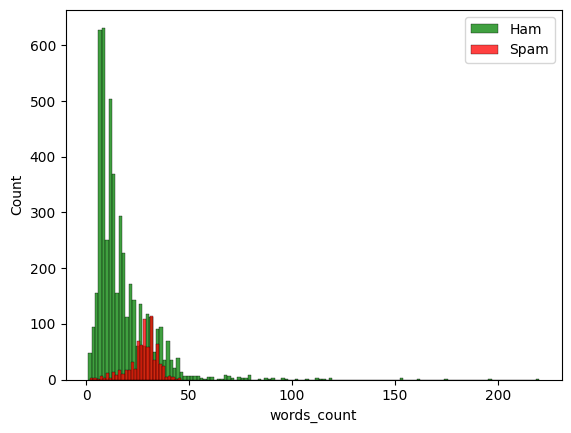

In [51]:
import seaborn as sns # Import the seaborn library
import matplotlib.pyplot as plt # Import the matplotlib library

# sns.histplot(df[df['is_spam']==0]['sentence_count'])
sns.histplot(df[df['is_spam']==0]['words_count'],color='green' )
sns.histplot(df[df['is_spam']==1]['words_count'], color='red' )
plt.legend(['Ham','Spam'])

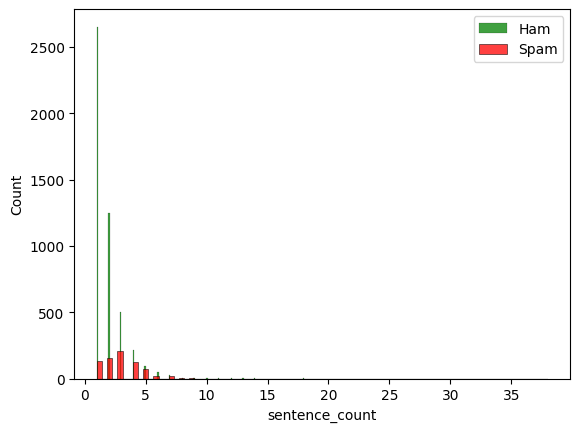

In [52]:
# sns.histplot(df[df['is_spam']==0]['sentence_count'])
sns.histplot(df[df['is_spam']==0]['sentence_count'], color='green' )
sns.histplot(df[df['is_spam']==1]['sentence_count'], color='red' )
plt.legend(['Ham','Spam'])

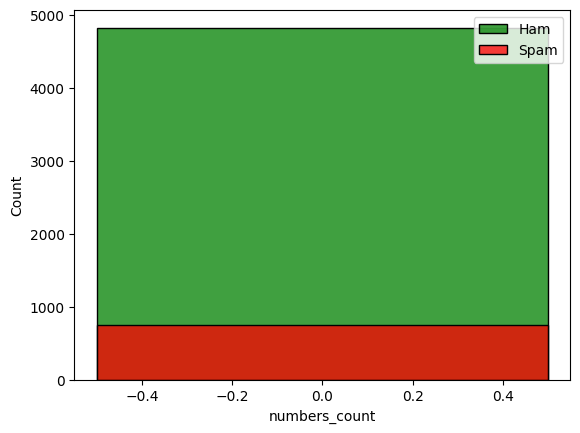

In [53]:
# sns.histplot(df[df['is_spam']==0]['sentence_count'])
sns.histplot(df[df['is_spam']==0]['numbers_count'], color='green' )
sns.histplot(df[df['is_spam']==1]['numbers_count'], color='red' )
plt.legend(['Ham','Spam'])

**Relationship between two variables from DataFrame**

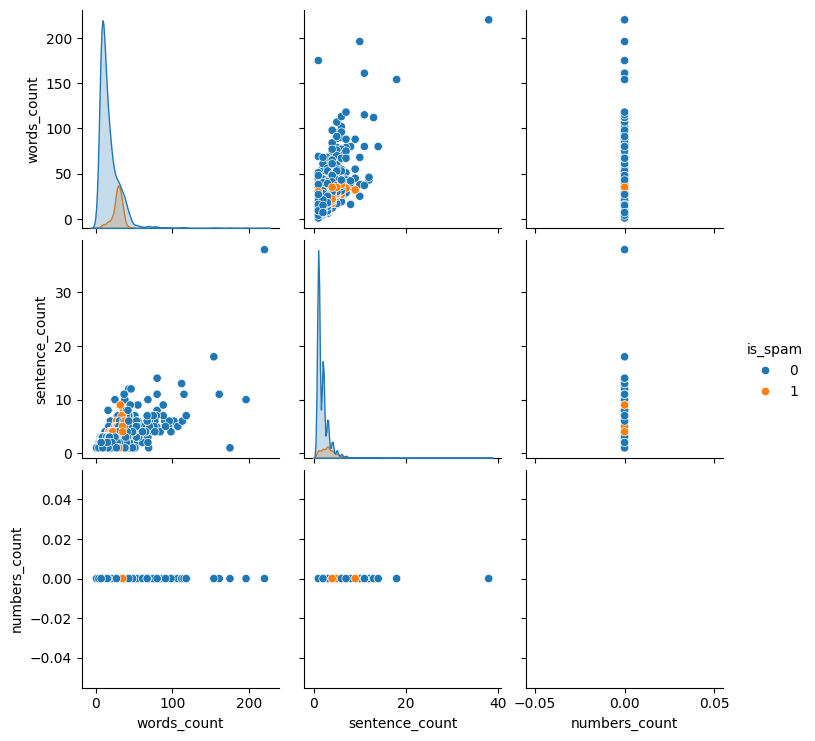

In [54]:
sns.pairplot(df,hue='is_spam') # Data points are colored based on whether they belong to the 'spam' or 'ham' category

**Find correlation between the sentence, words, and numbers count in each sms**

In [55]:
corr_columns = ['words_count','sentence_count','numbers_count','is_spam']
df[corr_columns].corr()

,words_count,sentence_count,numbers_count,is_spam
words_count,1.000000,0.685165,NaN,0.263221
sentence_count,0.685165,1.000000,NaN,0.265332
numbers_count,NaN,NaN,NaN,NaN
is_spam,0.263221,0.265332,NaN,1.000000


from matplotlib import pyplot as plt
_df_66['words_count'].plot(kind='hist', bins=20, title='words_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_67['sentence_count'].plot(kind='hist', bins=20, title='sentence_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_68['is_spam'].plot(kind='hist', bins=20, title='is_spam')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_69.plot(kind='scatter', x='words_count', y='sentence_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_70.plot(kind='scatter', x='sentence_count', y='is_spam', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_71['words_count'].plot(kind='line', figsize=(8, 4), title='words_count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_72['sentence_count'].plot(kind='line', figsize=(8, 4), title='sentence_count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_73['is_spam'].plot(kind='line', figsize=(8, 4), title='is_spam')
plt.gca().spines[['top', 'right']].set_visible(False)

<Axes: >

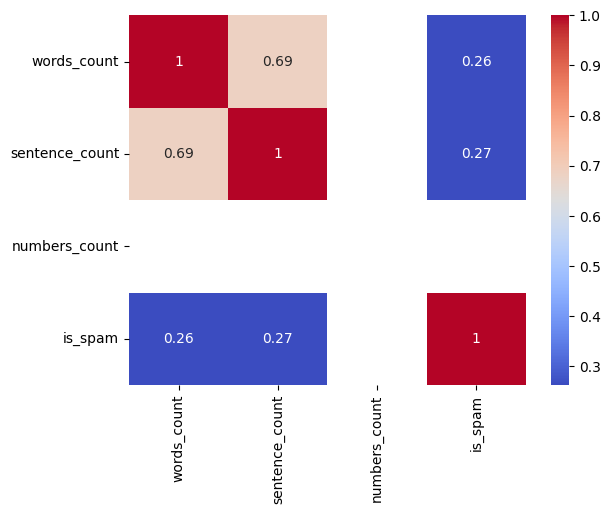

In [56]:
sns.heatmap(df[corr_columns].corr(), annot=True, cmap='coolwarm')

**# As I thought, the numbers in sms has strong correlation with the sms being sms or not.**

**Data Preprocessing**

In [57]:
def clean_sms(sms):
    # lowercase every word
    sms = sms.lower()
    # get stop words stop words
    stop_words = set(stopwords.words('english'))  # You need to define stopwords
    # get the punctuations
    punctuation_symbols = set(string.punctuation)
    punctuation_symbols = punctuation_symbols.union(['..', '...', '.'])
    # combine punctuations with stopwords
    stop_words_and_punctuation = stop_words.union(punctuation_symbols)
    # remove the stop words and punctuations from sms
    sms_tokens = nltk.word_tokenize(sms)
    sms = [word for word in sms_tokens if word not in stop_words_and_punctuation]
    sms = ' '.join(sms)
    return sms

In [59]:
!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import string
from nltk.corpus import stopwords

def clean_sms(sms):
    # lowercase every word
    sms = sms.lower()
    # get stop words stop words
    stop_words = set(stopwords.words('english'))
    # get the punctuations
    punctuation_symbols = set(string.punctuation)
    punctuation_symbols = punctuation_symbols.union(['..', '...', '.'])
    # combine punctuations with stopwords
    stop_words_and_punctuation = stop_words.union(punctuation_symbols)
    # remove the stop words and punctuations from sms
    sms_tokens = nltk.word_tokenize(sms)
    sms = [word for word in sms_tokens if word not in stop_words_and_punctuation]
    sms = ' '.join(sms)
    return sms

df['clean_sms'] = df['sms'].apply(clean_sms)
df

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,is_spam,sms,words_count,sentence_count,numbers_count,clean_sms
0,0,"Go until jurong point, crazy.. Available only ...",24,2,0,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,8,2,0,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,2,0,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,13,1,0,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",15,1,0,nah n't think goes usf lives around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,35,4,0,2nd time tried 2 contact u. u å£750 pound priz...
5568,0,Will Ì_ b going to esplanade fr home?,9,1,0,ì_ b going esplanade fr home
5569,0,"Pity, * was in mood for that. So...any other s...",15,2,0,pity mood suggestions
5570,0,The guy did some bitching but I acted like i'd...,27,1,0,guy bitching acted like 'd interested buying s...


from matplotlib import pyplot as plt
df['is_spam'].plot(kind='hist', bins=20, title='is_spam')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['words_count'].plot(kind='hist', bins=20, title='words_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['sentence_count'].plot(kind='hist', bins=20, title='sentence_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='is_spam', y='words_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='words_count', y='sentence_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['numbers_count']
  ys = series['is_spam']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('numbers_count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('numbers_count')
_ = plt.ylabel('is_spam')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['numbers_count']
  ys = series['words_count']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('numbers_count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('numbers_count')
_ = plt.ylabel('words_count')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['numbers_count']
  ys = series['sentence_count']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('numbers_count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('numbers_count')
_ = plt.ylabel('sentence_count')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['numbers_count']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'numbers_count'}, axis=1)
              .sort_values('numbers_count', ascending=True))
  xs = counted['numbers_count']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('numbers_count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('numbers_count')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
df['is_spam'].plot(kind='line', figsize=(8, 4), title='is_spam')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['words_count'].plot(kind='line', figsize=(8, 4), title='words_count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['sentence_count'].plot(kind='line', figsize=(8, 4), title='sentence_count')
plt.gca().spines[['top', 'right']].set_visible(False)

**Displaying the word cloud**

In [60]:
from wordcloud import WordCloud
wc = WordCloud(width=750,height=600,min_font_size=14,background_color='white')

**Spam words**

In [61]:
spam_wc = wc.generate(df[df['is_spam']==1]['clean_sms'].str.cat(sep=" "))

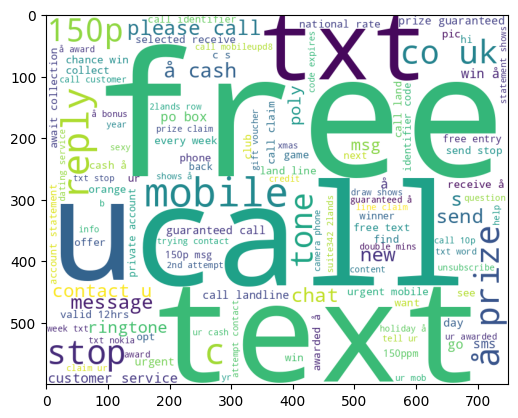

In [62]:
plt.imshow(spam_wc)

**Ham words**

In [63]:
ham_wc = wc.generate(df[df['is_spam']==0]['clean_sms'].str.cat(sep=" "))

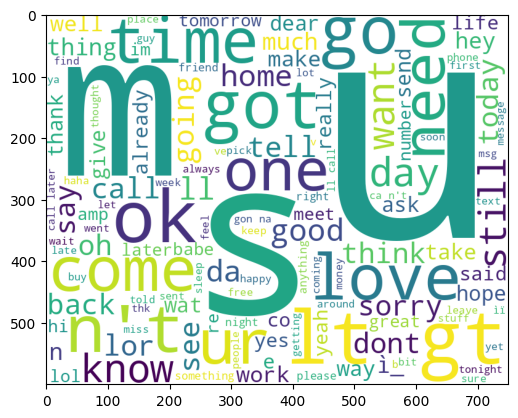

In [64]:
plt.imshow(ham_wc)

**Cleaned Ham SMS**

In [65]:
hams = df[df['is_spam']==0]['clean_sms'].tolist()
hams

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'u dun say early hor u c already say',
 "nah n't think goes usf lives around though",
 'even brother like speak treat like aids patent',
 "per request 'melle melle oru minnaminunginte nurungu vettam set callertune callers press 9 copy friends callertune",
 "'m gon na home soon n't want talk stuff anymore tonight k 've cried enough today",
 "'ve searching right words thank breather promise wont take help granted fulfil promise wonderful blessing times",
 'date sunday',
 "oh k 'm watching",
 'eh u remember 2 spell name yes v naughty make v wet',
 'fine thatåõs way u feel thatåõs way gota b',
 'seriously spell name',
 'i\x89û÷m going try 2 months ha ha joking',
 'ì_ pay first lar da stock comin',
 'aft finish lunch go str lor ard 3 smth lor u finish ur lunch already',
 'ffffffffff alright way meet sooner',
 "forced eat slice 'm really hungry tho sucks mark getting worried kn

**Cleaned Spam SMS**

In [66]:
spams = df[df['is_spam']==1]['clean_sms'].tolist()
spams

["free entry 2 wkly comp win fa cup final tkts 21st may 2005. text fa 87121 receive entry question std txt rate c 's apply 08452810075over18 's",
 "freemsg hey darling 's 3 week 's word back 'd like fun still tb ok xxx std chgs send å£1.50 rcv",
 'winner valued network customer selected receivea å£900 prize reward claim call 09061701461. claim code kl341 valid 12 hours',
 'mobile 11 months u r entitled update latest colour mobiles camera free call mobile update co free 08002986030',
 'six chances win cash 100 20,000 pounds txt csh11 send 87575. cost 150p/day 6days 16+ tsandcs apply reply hl 4 info',
 'urgent 1 week free membership å£100,000 prize jackpot txt word claim 81010 c www.dbuk.net lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt message click http //wap xxxmobilemovieclub.com n=qjkgighjjgcbl',
 'england v macedonia dont miss goals/team news txt ur national team 87077 eg england 87077 try wales scotland 4txt/ì¼1.20 poboxox36504w45wq 16+',
 

**Split Train and test Data**

In [67]:
X = df['clean_sms']
y = df['is_spam']

In [68]:
print(X.shape)
print(y.shape)

(5572,)
(5572,)


In [70]:
!pip install scikit-learn # Install scikit-learn if you haven't already
from sklearn.model_selection import train_test_split # Import the necessary function

X = df['clean_sms']
y = df['is_spam']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42) # Now this line should work

In [71]:
print(X_train.shape)
print(y_train.shape)

(3900,)
(3900,)


In [72]:
print(X_test.shape)
print(y_test.shape)

(1672,)
(1672,)


**# TF-IDF Vectorizer**

In [74]:
!pip install scikit-learn # Install scikit-learn if you haven't already
from sklearn.feature_extraction.text import TfidfVectorizer # Import TfidfVectorizer

vectorizer = TfidfVectorizer() # Now you can use it

In [75]:
X_train = vectorizer.fit_transform(X_train)

In [76]:
print(type(X_train))
print(X_train.shape)

<class 'scipy.sparse._csr.csr_matrix'>
(3900, 7136)


**Naive Bayes Classifier**

In [78]:
from sklearn.naive_bayes import MultinomialNB # Import the MultinomialNB class

model = MultinomialNB() # Now you can create an instance of the class

In [79]:
model.fit(X_train, y_train)

MultinomialNB()

**Test**

In [80]:
X_test = vectorizer.transform(X_test)
print(X_test.shape)

(1672, 7136)


In [81]:
y_pred = model.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [83]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)
print(y_pred)

accuracy = accuracy_score(y_test, y_pred) # Now accuracy_score is defined
print(f"Accuracy = {(accuracy*100):.2f}%")
print(classification_report(y_test, y_pred,  zero_division=1))

[0 0 0 ... 0 0 0]
Accuracy = 97.13%
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1453
           1       1.00      0.78      0.88       219

    accuracy                           0.97      1672
   macro avg       0.98      0.89      0.93      1672
weighted avg       0.97      0.97      0.97      1672



**Result: Thus, the model can predict whethere the given sms is spam or not with the accuracy of 97.13%.**